# Next-Day Stock Price Prediction with Machine Learning Models

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/tcs_1year.csv')
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,16-Jan-2024,EQ,"3,899.00","3,899.00","3,855.55","3,903.80","3,861.05","3,861.30","3,873.57","3,965.00","3,070.25","14,32,672","5,54,95,55,027.65","1,57,027"
1,15-Jan-2024,EQ,"3,960.00","3,965.00","3,885.00","3,882.80","3,902.00","3,903.80","3,922.67","3,965.00","3,070.25","28,01,505","10,98,93,86,687.15","2,65,310"
2,12-Jan-2024,EQ,"3,848.00","3,905.25","3,821.60","3,735.55","3,881.90","3,882.80","3,873.63","3,929.00","3,070.25","68,13,450","26,39,28,05,818.30","3,37,824"
3,11-Jan-2024,EQ,"3,724.00","3,773.00","3,707.00","3,713.05","3,726.70","3,735.55","3,738.42","3,929.00","3,070.25","17,77,909","6,64,65,66,140.90","1,35,916"
4,10-Jan-2024,EQ,"3,690.00","3,729.25","3,688.00","3,689.90","3,707.05","3,713.05","3,706.94","3,929.00","3,070.25","12,92,227","4,79,02,02,220.40","1,11,912"


In [ ]:
df.shape  #viewing shape of dataframe

(247, 14)

In [ ]:
df.describe() #describing dataframe

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
count,247,247,247,247,247,247,247,247,247,247,247,247,247,247
unique,247,1,219,241,237,246,227,246,247,20,4,247,247,247
top,16-Jan-2024,EQ,"3,420.00","3,524.85","3,330.85","3,220.70","3,391.00","3,220.70","3,873.57","3,575.00","2,926.10","14,32,672","5,54,95,55,027.65","1,57,027"
freq,1,247,3,2,2,2,3,2,1,93,174,1,1,1


In [ ]:
df.info() #attribute list of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           247 non-null    object
 1   series         247 non-null    object
 2   OPEN           247 non-null    object
 3   HIGH           247 non-null    object
 4   LOW            247 non-null    object
 5   PREV. CLOSE    247 non-null    object
 6   ltp            247 non-null    object
 7   close          247 non-null    object
 8   vwap           247 non-null    object
 9   52W H          247 non-null    object
 10  52W L          247 non-null    object
 11  VOLUME         247 non-null    object
 12  VALUE          247 non-null    object
 13  No of trades   247 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [ ]:
print(df.columns) #list of column names
print(df['close ']) #printing close values

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')
0      3,861.30
1      3,903.80
2      3,882.80
3      3,735.55
4      3,713.05
         ...   
242    3,414.90
243    3,363.10
244    3,373.10
245    3,390.00
246    3,378.40
Name: close , Length: 247, dtype: object


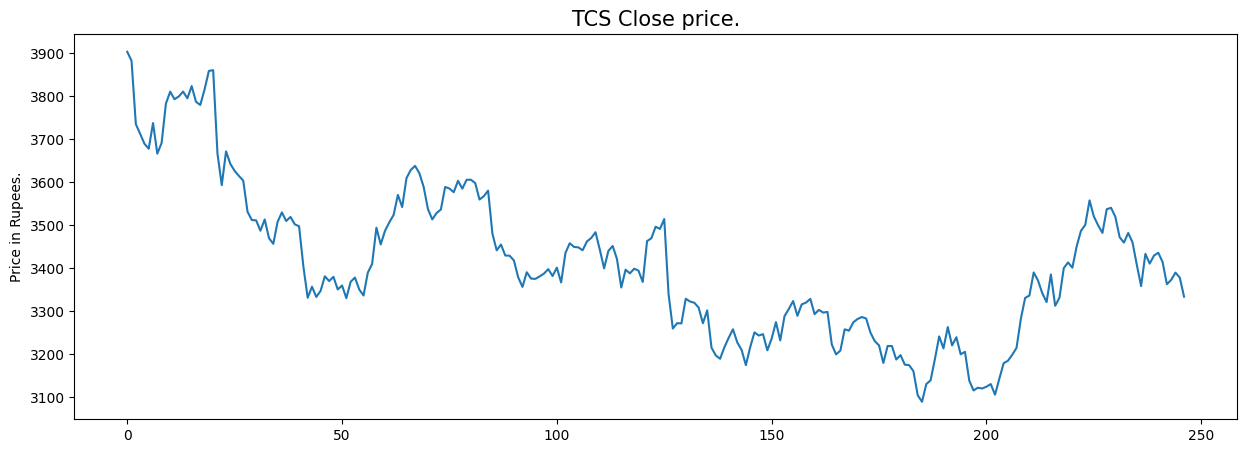

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df['PREV. CLOSE '])
plt.title('TCS Close price.', fontsize=15)
plt.ylabel('Price in Rupees.')
plt.show()


From the above graph we are generating a line plot of the 'PREV. CLOSE' values for the TCS stocks. The plot represents the trend or changes in the 'PREV. CLOSE' prices over the data points in the DataFrame.

In [ ]:
df[df['PREV. CLOSE '] == df['PREV. CLOSE ']].shape  #for null values


(247, 14)

In [ ]:
df = df.drop(['close '], axis=1)  #dropping close column

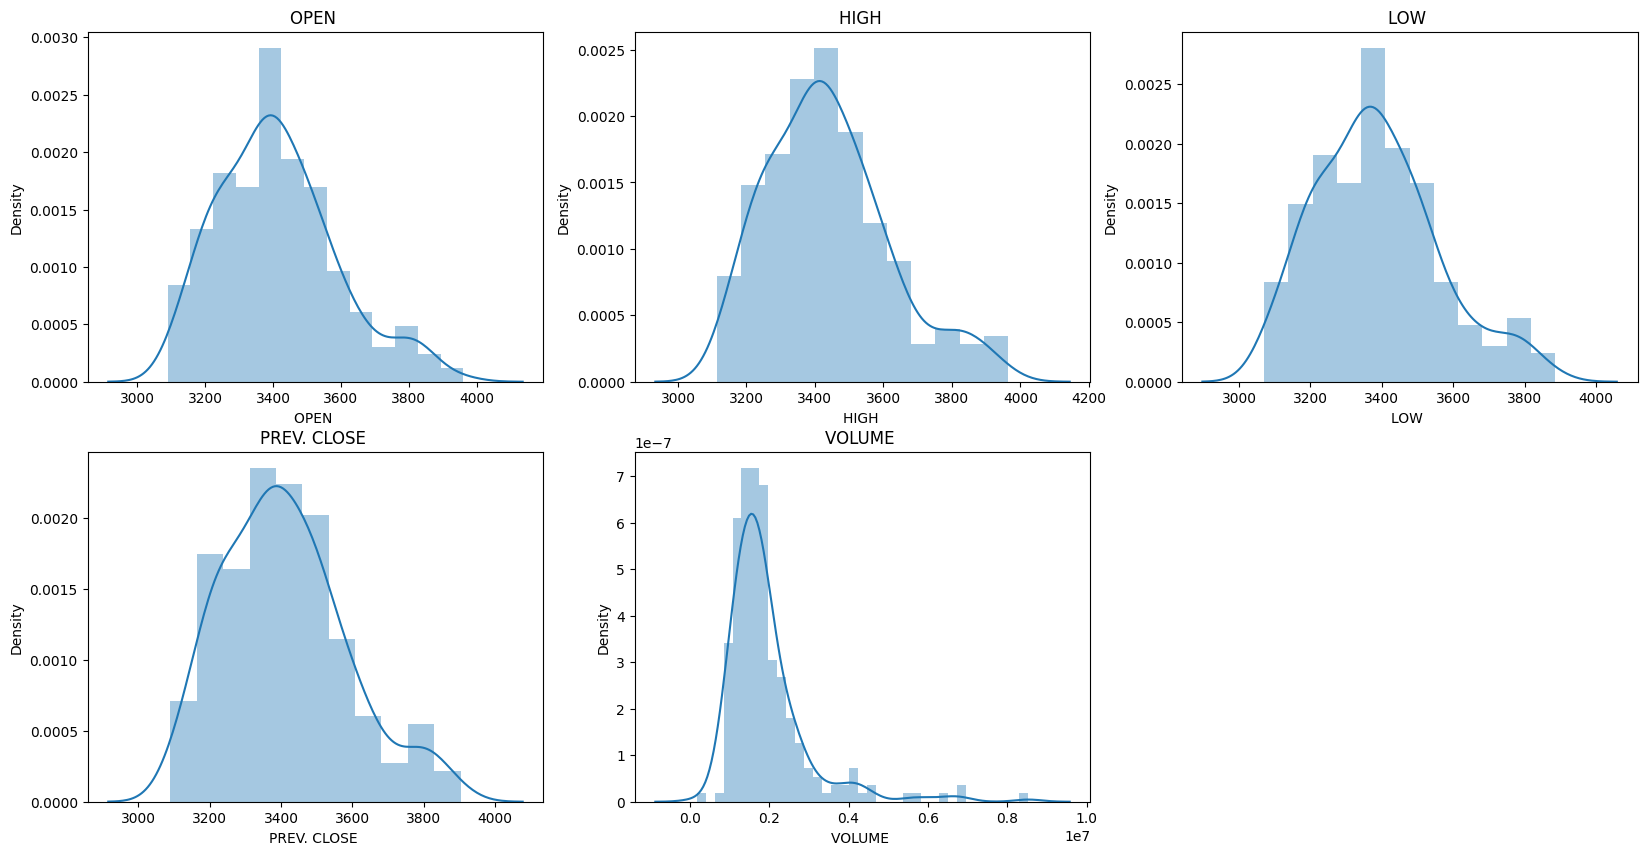

In [ ]:
features = ['OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'VOLUME ']

# Remove commas and convert to numeric
for col in features:
    df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

# Plot the distributions
plt.subplots(figsize=(20, 10))

for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sb.distplot(df[col].dropna())  # Drop NaN values after conversion
    plt.title(col)

plt.show()


The above graph is a set of distribution plots for the specified numeric features in the TCS stock data, allowing us to visualize the distribution of values for each feature. This can provide insights into the spread and central tendency of the data for each feature.

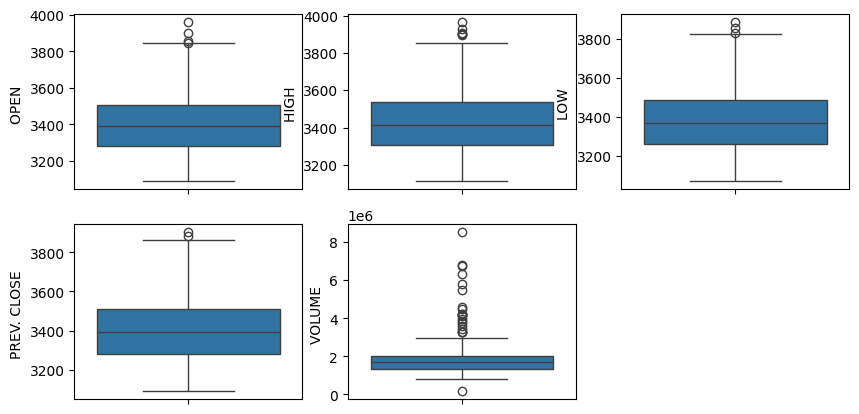

In [ ]:
plt.subplots(figsize=(10,5))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()


in above graph a set of boxplots, one for each specified numeric feature in the selected DataFrame. Each boxplot provides a visual representation of the distribution of values for a particular feature, showing statistics such as the median, quartiles, and potential outliers. The subplot grid layout allows you to compare the boxplots for different features side by side. Boxplots are useful for identifying the central tendency and spread of the data and spotting any potential outliers.

following code creates new field of day month and year in the dataframe

In [ ]:
# Convert 'Date' column to datetime format
df['Date '] = pd.to_datetime(df['Date '], format='%d-%b-%Y', errors='coerce')

# Extract day, month, and year
df['day'] = df['Date '].dt.day
df['month'] = df['Date '].dt.month
df['year'] = df['Date '].dt.year

# Display the modified DataFrame
df.head()


,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,vwap,52W H,52W L,VOLUME,VALUE,No of trades,day,month,year
0,2024-01-16,EQ,3899.0,3899.00,3855.55,3903.80,"3,861.05","3,873.57","3,965.00","3,070.25",1432672,"5,54,95,55,027.65","1,57,027",16,1,2024
1,2024-01-15,EQ,3960.0,3965.00,3885.00,3882.80,"3,902.00","3,922.67","3,965.00","3,070.25",2801505,"10,98,93,86,687.15","2,65,310",15,1,2024
2,2024-01-12,EQ,3848.0,3905.25,3821.60,3735.55,"3,881.90","3,873.63","3,929.00","3,070.25",6813450,"26,39,28,05,818.30","3,37,824",12,1,2024
3,2024-01-11,EQ,3724.0,3773.00,3707.00,3713.05,"3,726.70","3,738.42","3,929.00","3,070.25",1777909,"6,64,65,66,140.90","1,35,916",11,1,2024
4,2024-01-10,EQ,3690.0,3729.25,3688.00,3689.90,"3,707.05","3,706.94","3,929.00","3,070.25",1292227,"4,79,02,02,220.40","1,11,912",10,1,2024


the following code is creating a new binary column in the DataFrame df named 'is_quarter_end'. The column will have a value of 1 if the corresponding date's month is the end of a quarter, and 0 otherwise. This logic is based on the condition df['month'] % 3 == 0 and respective distributions are being shown

In [ ]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,vwap,52W H,52W L,VOLUME,VALUE,No of trades,day,month,year,is_quarter_end
0,2024-01-16,EQ,3899.0,3899.00,3855.55,3903.80,"3,861.05","3,873.57","3,965.00","3,070.25",1432672,"5,54,95,55,027.65","1,57,027",16,1,2024,0
1,2024-01-15,EQ,3960.0,3965.00,3885.00,3882.80,"3,902.00","3,922.67","3,965.00","3,070.25",2801505,"10,98,93,86,687.15","2,65,310",15,1,2024,0
2,2024-01-12,EQ,3848.0,3905.25,3821.60,3735.55,"3,881.90","3,873.63","3,929.00","3,070.25",6813450,"26,39,28,05,818.30","3,37,824",12,1,2024,0
3,2024-01-11,EQ,3724.0,3773.00,3707.00,3713.05,"3,726.70","3,738.42","3,929.00","3,070.25",1777909,"6,64,65,66,140.90","1,35,916",11,1,2024,0
4,2024-01-10,EQ,3690.0,3729.25,3688.00,3689.90,"3,707.05","3,706.94","3,929.00","3,070.25",1292227,"4,79,02,02,220.40","1,11,912",10,1,2024,0


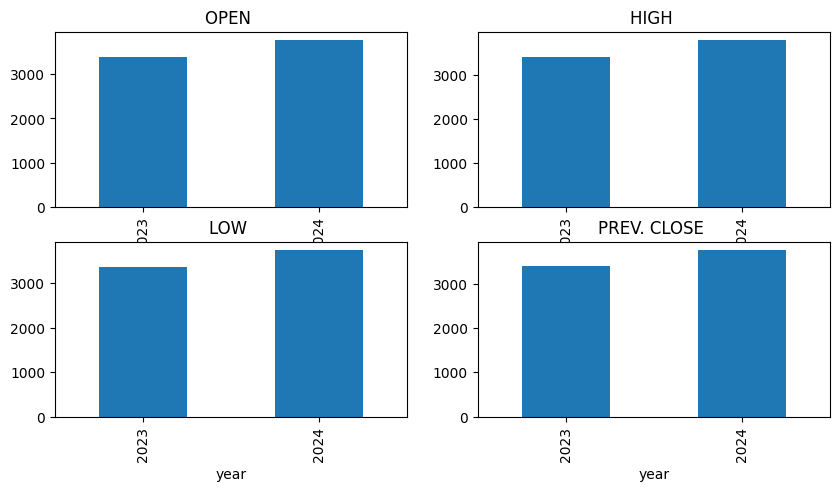

In [ ]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(10,5))

for i, col in enumerate(['OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ']):
  plt.subplot(2,2,i+1)
  plt.title(col)
  data_grouped[col].plot.bar()
plt.show()


The above graph does the comparison among the attributes of TCS data among 2024 and 2024 data

In [ ]:
df.groupby('is_quarter_end').mean() #finding mean of the categorised quarter dates


,OPEN,HIGH,LOW,PREV. CLOSE,VOLUME,day,month,year
is_quarter_end,,,,,,,,
0,3409.161818,3433.640303,3383.526667,3407.151818,1.907673e+06,15.727273,6.024242,2023.072727
1,3419.101829,3447.265854,3391.301220,3415.734146,1.980150e+06,15.621951,7.426829,2023.000000


from matplotlib import pyplot as plt
_df_28['is_quarter_end'].plot(kind='hist', bins=20, title='is_quarter_end')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29['OPEN '].plot(kind='hist', bins=20, title='OPEN ')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30['HIGH '].plot(kind='hist', bins=20, title='HIGH ')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31['LOW '].plot(kind='hist', bins=20, title='LOW ')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32.plot(kind='scatter', x='is_quarter_end', y='OPEN ', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33.plot(kind='scatter', x='OPEN ', y='HIGH ', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34.plot(kind='scatter', x='HIGH ', y='LOW ', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35.plot(kind='scatter', x='LOW ', y='PREV. CLOSE ', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['is_quarter_end']
  ys = series['day']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_36.sort_values('is_quarter_end', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('is_quarter_end')
_ = plt.ylabel('day')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['is_quarter_end']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'is_quarter_end'}, axis=1)
              .sort_values('is_quarter_end', ascending=True))
  xs = counted['is_quarter_end']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_37.sort_values('is_quarter_end', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('is_quarter_end')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['OPEN ']
  ys = series['day']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_38.sort_values('OPEN ', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('OPEN ')
_ = plt.ylabel('day')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['OPEN ']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'OPEN '}, axis=1)
              .sort_values('OPEN ', ascending=True))
  xs = counted['OPEN ']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_39.sort_values('OPEN ', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('OPEN ')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_40['is_quarter_end'].plot(kind='line', figsize=(8, 4), title='is_quarter_end')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_41['OPEN '].plot(kind='line', figsize=(8, 4), title='OPEN ')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_42['HIGH '].plot(kind='line', figsize=(8, 4), title='HIGH ')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_43['LOW '].plot(kind='line', figsize=(8, 4), title='LOW ')
plt.gca().spines[['top', 'right']].set_visible(False)

creating new columns for further computation

In [ ]:
df['open-close'] = df['OPEN '] - df['PREV. CLOSE ']
df['low-high'] = df['LOW '] - df['HIGH ']
df['target'] = np.where(df['PREV. CLOSE '].shift(-1) > df['PREV. CLOSE '], 1, 0)
# 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE '

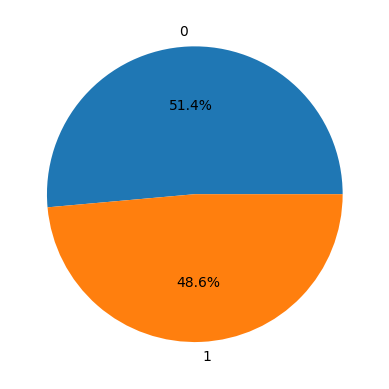

In [ ]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()


the above plot indicates target distribution with the help of pie chart

fuether we extract features and target, and split data to train and test accordingly

In [ ]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(222, 3) (25, 3)


further we use 3 models, Logistic regression, Support vector and XGBclassifier to train models and obtain train and test accuracy for each

In [ ]:
models = [LogisticRegression(), SVC(
kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()


LogisticRegression() : 
Training Accuracy :  0.5157569850552307
Validation Accuracy :  0.46794871794871795

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.6115984405458089
Validation Accuracy :  0.4871794871794871

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training

Among the three models, we have trained XGBClassifier has the highest performance but it is pruned to overfitting as the difference between the training and the validation accuracy is too high. But in the case of the Logistic Regression, this is not the case.